In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import json


## Drawing of square obstacles

In [2]:
class square:
    def __init__(self, tl, br):
        self.top_left = tl
        self.bottom_right = br
        self.transform()
        
    def transform(self):
        self.ll = [self.top_left[0], self.bottom_right[1]]
        self.width = self.bottom_right[0] - self.top_left[0]
        self.height = self.top_left[1] - self.bottom_right[1]
        

obs1 = square([1,9], [3,7])
obs2 = square([9,3], [10,-10])
obs3 = square([2,0], [4,-3])
obs4 = square([8,9], [9,7])



## Initial configuration and load results

In [3]:
play_ground = square([0,10], [10,-10])
start = [5,-9]
goal = [0,10]
path = np.loadtxt('build/unit_tests/path.csv')
# print(path)
with open('build/unit_tests/rrt.json', 'r') as js:
    tree = json.load(js)


## Function to plot rrt tree

In [4]:
def plot_rrt(tree):
    for index, node in tree.items():
        node['value'][0]
        plt.scatter(node['value'][0], node['value'][1], c=3, s=80, marker='.')
        if(node['parent']!=0):
            plt.plot([node['value'][0], node['parent'][0]], [node['value'][1], node['parent'][1]], '--g')
        

## Visualize of RRT

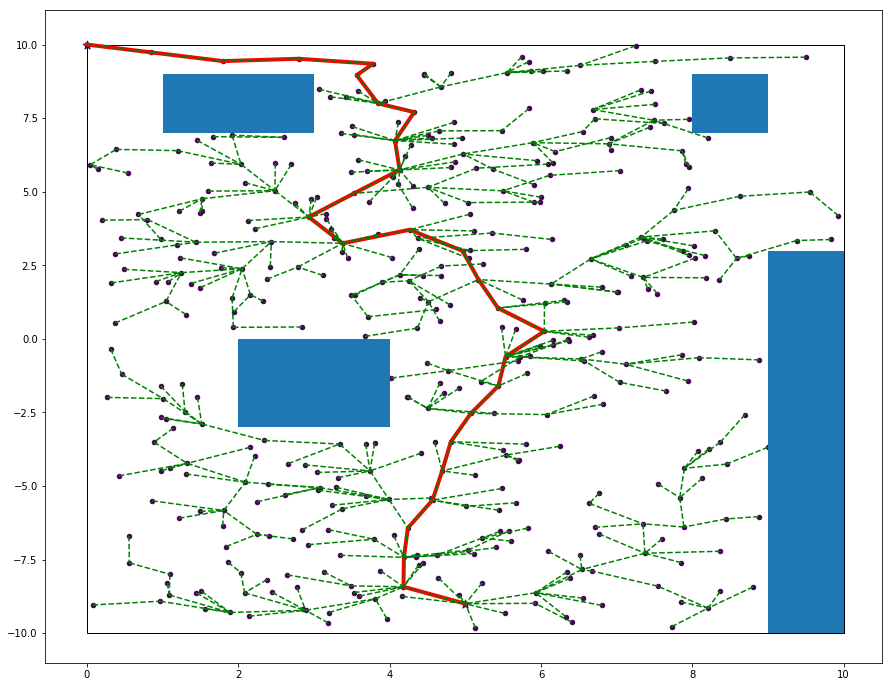

In [5]:
fig, ax = plt.subplots(figsize=[15,12])
ax.add_patch(pat.Rectangle(play_ground.ll, play_ground.width, play_ground.height, fill=False))
ax.add_patch(pat.Rectangle(obs1.ll, obs1.width, obs1.height))
ax.add_patch(pat.Rectangle(obs2.ll, obs2.width, obs2.height))
ax.add_patch(pat.Rectangle(obs3.ll, obs3.width, obs3.height))
ax.add_patch(pat.Rectangle(obs4.ll, obs4.width, obs4.height))

plt.scatter(start[0], start[1], c=3, s=80, marker='*')
plt.scatter(goal[0], goal[1], c=3, s=80, marker='*')
plt.plot(path[:,0], path[:,1], '-r', linewidth=4)

plot_rrt(tree)

plt.show()


